<a href="https://colab.research.google.com/github/zaegeon/Python/blob/main/ML/20220704_ML16_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN(Convolutional Neural Network, 합성곱 신경망)

# Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve, convolve2d, correlate, correlate2d

from sklearn import datasets
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras

# Convolution(합성곱) 연산

## 1-D Convolution

In [ ]:
x = np.arange(1, 5)
x

array([1, 2, 3, 4])

In [ ]:
y = np.array([1, 2])
y

array([1, 2])

In [ ]:
convolve(x, y, mode='valid') # 반전 배열

array([ 4,  7, 10])

In [ ]:
convolve(x, y, mode='same')

array([ 1,  4,  7, 10])

In [ ]:
convolve(x, y, mode='full')

array([ 1,  4,  7, 10,  8])

## 1-D Cross Correlation(교차 상관)

In [ ]:
print(x)
print(y)

[1 2 3 4]
[1 2]


In [ ]:
correlate(x, y, mode='valid')

array([ 5,  8, 11])

In [ ]:
correlate(x, y, mode='same')

array([ 2,  5,  8, 11])

In [ ]:
correlate(x, y, mode='full')

array([ 2,  5,  8, 11,  4])

## 2-D Convolution

In [ ]:
x = np.arange(1, 17).reshape((4, 4))
x

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16]])

In [ ]:
y = np.array([[0, 1],
              [2, 0]])
y

array([[0, 1],
       [2, 0]])

In [ ]:
convolve2d(x, y, mode='valid')

array([[ 9, 12, 15],
       [21, 24, 27],
       [33, 36, 39]])

In [ ]:
convolve2d(x, y, mode='same')

array([[ 0,  1,  2,  3],
       [ 2,  9, 12, 15],
       [10, 21, 24, 27],
       [18, 33, 36, 39]])

In [ ]:
convolve2d(x, y, mode='full')

array([[ 0,  1,  2,  3,  4],
       [ 2,  9, 12, 15,  8],
       [10, 21, 24, 27, 12],
       [18, 33, 36, 39, 16],
       [26, 28, 30, 32,  0]])

In [ ]:
correlate2d(x, y, mode='valid')

array([[12, 15, 18],
       [24, 27, 30],
       [36, 39, 42]])

In [ ]:
correlate2d(x, y, mode='same')

array([[12, 15, 18, 16],
       [24, 27, 30, 24],
       [36, 39, 42, 32],
       [14, 15, 16,  0]])

In [ ]:
correlate2d(x, y, mode='full')

array([[ 0,  2,  4,  6,  8],
       [ 1, 12, 15, 18, 16],
       [ 5, 24, 27, 30, 24],
       [ 9, 36, 39, 42, 32],
       [13, 14, 15, 16,  0]])

## 3-D Convolution

In [ ]:
china = datasets.load_sample_image('china.jpg')
# jpg 이미지를 numpy.ndarray로 변환해서 로드

In [ ]:
china.shape

(427, 640, 3)

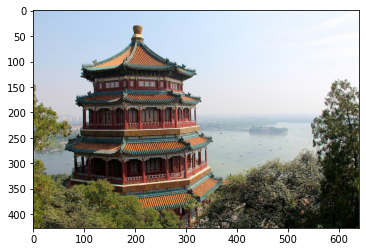

In [ ]:
plt.imshow(china)
plt.show()

In [ ]:
flower = datasets.load_sample_image('flower.jpg')

In [ ]:
flower.shape

(427, 640, 3)

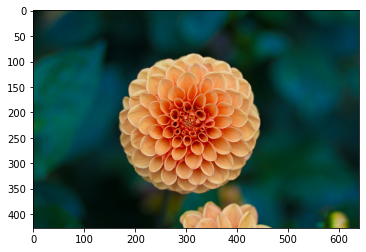

In [ ]:
plt.imshow(flower)
plt.show()

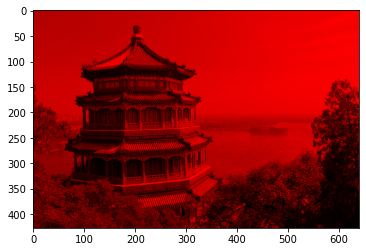

In [ ]:
china_cp = china.copy()
china_cp[:, :, [1, 2]] = 0
plt.imshow(china_cp)
plt.show()

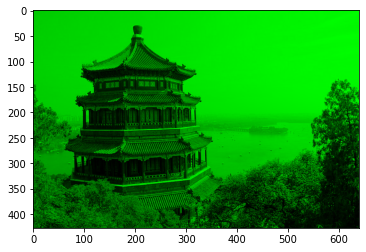

In [ ]:
china_cp = china.copy()
china_cp[:, :, [0, 2]] = 0
plt.imshow(china_cp)
plt.show()

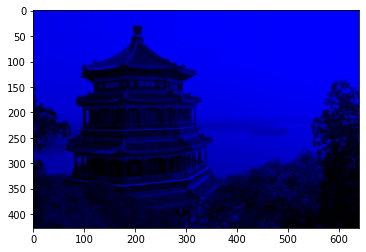

In [ ]:
china_cp = china.copy()
china_cp[:, :, [0, 1]] = 0
plt.imshow(china_cp)
plt.show()

(427, 640, 3)


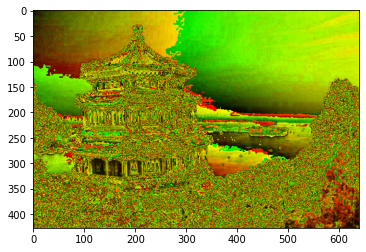

In [ ]:
# 3차원 배열에서의 convolution(합성곱) 연산
filter = np.ones(shape=(3,3,3))
filter[:, :, [1, 2]] = 0
conv = convolve(china, filter, mode='same')
print(conv.shape)

plt.imshow(conv.astype(np.uint8)) # 8-bit unsigned integer : 0~255 범위의 숫자로 변환
plt.show()

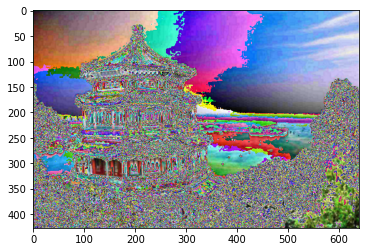

In [ ]:
filter = np.ones(shape=(3,3,3))
filter[:, :, [0, 2]] = 0
conv = convolve(china, filter, mode='same')

plt.imshow(conv.astype(np.uint8))
plt.show()

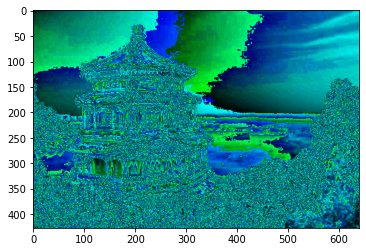

In [ ]:
filter = np.ones(shape=(3,3,3))
filter[:, :, [0, 1]] = 0
conv = convolve(china, filter, mode='same')

plt.imshow(conv.astype(np.uint8))
plt.show()

# Pooling 연산

In [3]:
x = np.arange(16).reshape((4, 4))
x

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [4]:
max_pooling = keras.layers.MaxPool2D()

In [5]:
x = x.reshape((1, 4, 4, 1))
x_pooled = max_pooling(x)
x_pooled
# 5 : [0, 1, 4, 5] 중 최댓값 / 7 : [2, 3, 6, 7] 중 최댓값 / 13 : [8, 9, 12, 13] 중 최댓값 / 15 : [10, 11, 14, 15] 중 최댓값

<tf.Tensor: shape=(1, 2, 2, 1), dtype=int64, numpy=
array([[[[ 5],
         [ 7]],

        [[13],
         [15]]]])>

In [6]:
tf.reshape(x_pooled, [2, 2])

<tf.Tensor: shape=(2, 2), dtype=int64, numpy=
array([[ 5,  7],
       [13, 15]])>

In [7]:
# tensor → numpy ndarray로 변환 → ndarray의 reshape 메서드 호출
x_pooled.numpy().reshape((2, 2))

array([[ 5,  7],
       [13, 15]])

In [ ]:
x = np.arange(25).reshape((5, 5))
x

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [ ]:
x = x.reshape((1, 5, 5, 1))
x_pooled = max_pooling(x)
x_pooled

<tf.Tensor: shape=(1, 2, 2, 1), dtype=int64, numpy=
array([[[[ 6],
         [ 8]],

        [[16],
         [18]]]])>

In [ ]:
tf.reshape(x_pooled, [2, 2])

<tf.Tensor: shape=(2, 2), dtype=int64, numpy=
array([[ 6,  8],
       [16, 18]])>

## 이미지에서의 Pooling

In [ ]:
china.shape

(427, 640, 3)

In [ ]:
china_4d = china.reshape((1, 427, 640, 3))
china_pooled = max_pooling(china_4d)
china_pooled.shape

TensorShape([1, 213, 320, 3])

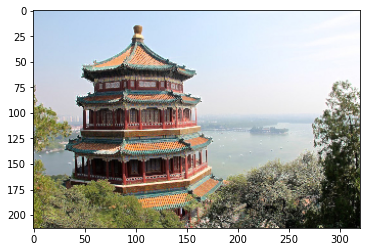

In [ ]:
img = china_pooled.numpy()[0]
plt.imshow(img)
plt.show()

# CNN

**CNN(Convolutional Neural Network, 합성곱 신경망)**

* filter : 합성곱 레이어(convolutional layer)의 unit(neuron).
* kernal : 합성곱 레이어의 입력에 곱해지는 가중치. 필터의 값.
* feature map(특성 맵) : 합성곱 연산을 통해서 얻은 출력.
* padding : 입력 배열 주위에 가상의 원소(0)를 채우는 것.
    * same padding : 입력과 특성 맵의 크기를 동일하게 만들기 위한 패딩.
    * valid padding : 패딩 없이 입력 배열에 합성곱 연산을 수행해서 특성 맵을 만드는 것. 특성 맵의 크기는 입력 배열의 크기보다 줄어듦.
* stride : filter를 이동시키는 보폭. convolution에서 기본값은 1.
* pooling :
    * max pooling : 필터 내에서 입력 배열의 최댓값을 선택.
    * average pooling : 필터 내에서 입력 배열의 평균을 선택.
    * 평균 풀링은 특성 맵의 중요한 정보들을 희석시킬 수 있기 때문에 많은 경우에 평균 풀링보다 최대 풀링을 사용함.
    * 합성곱에서 stride를 크게 해서 특성 맵의 크기를 줄이는 것보다 풀링 층에서 크기를 줄이는 것이 일반적으로 더 나은 성능을 내기 때문에 풀링을 사용함.

## Fashion MNIST datasets

In [ ]:
(x_tr_full, y_tr_full), (x_te, y_te) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
x_tr_full.shape

(60000, 28, 28)

x_tr_full, x_test는 0 ~ 255 정수 스케일. 

→ 0 ~ 1 실수 스케일로 변환할 필요가 있음. (Tensorflow는 암묵적인 타입 변환을 수행하지 않음.)

In [ ]:
x_tr_full = x_tr_full / 255
x_te = x_te / 255

tensorflow.keras의 합성곱 층(convolutional layer)은 입력이 3차원 배열(height, width, depth)이어야 함.

depth 차원이 없는 흑백 이미지인 경우에는 3차원 배열로 모양(shape)을 변환해야 함.

In [ ]:
x_tr_full = x_tr_full.reshape((-1, 28, 28, 1))
x_te = x_te.reshape((-1, 28, 28, 1))

In [ ]:
x_tr_full.shape, x_te.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

훈련 셋을 훈련/검증 셋으로 분리

In [ ]:
x_tr, x_val, y_tr, y_val = train_test_split(x_tr_full, y_tr_full,
                                            test_size=0.2,
                                            random_state=42,
                                            stratify=y_tr_full)

## CNN 모델을 생성, 훈련

In [ ]:
conv_model = keras.Sequential()
# convolutional layer
conv_model.add(keras.layers.Convolution2D(filters=32, kernel_size=3, padding='same',
                                     activation='relu', input_shape=(28, 28, 1)))
# max pooling layer
conv_model.add(keras.layers.MaxPool2D())
# convolutional layer
conv_model.add(keras.layers.Convolution2D(filters=64, kernel_size=3, padding='same',
                                     activation='relu'))
# max pooling layer
conv_model.add(keras.layers.MaxPool2D())
# flatten layer - Dense layer를 연결하기 위해서
conv_model.add(keras.layers.Flatten())
# Dense layer
conv_model.add(keras.layers.Dense(units=100, activation='relu'))
# drop out - overfitting을 줄이기 위한 규제
conv_model.add(keras.layers.Dropout(rate=0.3))
# output layer
conv_model.add(keras.layers.Dense(units=10, activation='softmax'))

conv_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

In [ ]:
# 첫 번째 합성곱 층의 파라미터 개수 = (kernel_x * kernel_y * kernel_z + bias) * filters
(3 * 3 * 1 + 1) * 32

320

In [ ]:
# 두 번째 합성곱 층의 파라미터 개수
(3 * 3 * 32 + 1) * 64

18496

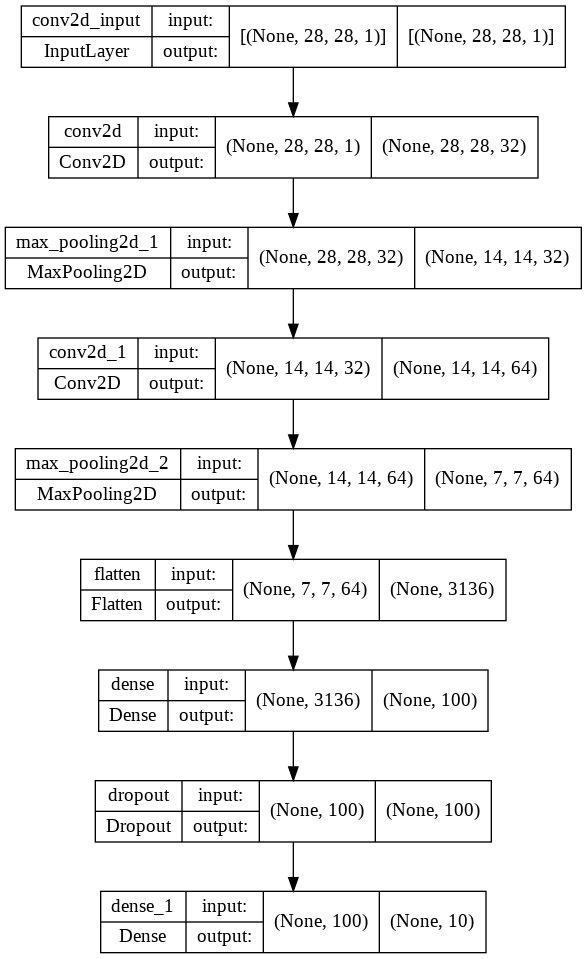

In [ ]:
keras.utils.plot_model(conv_model, show_shapes=True)

In [ ]:
conv_model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.sparse_categorical_crossentropy,
              metrics=keras.metrics.sparse_categorical_accuracy)

In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('best_cnn_model.h5',
                                                save_best_only=True)
early_stop_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

In [ ]:
history = conv_model.fit(x_tr, y_tr, epochs=100, callbacks=[checkpoint_cb, early_stop_cb],
                         validation_data=(x_val, y_val))

Epoch 1/100
1500/1500 [==============================] - 18s 4ms/step - loss: 0.4757 - sparse_categorical_accuracy: 0.8292 - val_loss: 0.3069 - val_sparse_categorical_accuracy: 0.8913
Epoch 2/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3130 - sparse_categorical_accuracy: 0.8856 - val_loss: 0.2593 - val_sparse_categorical_accuracy: 0.9051
Epoch 3/100
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2645 - sparse_categorical_accuracy: 0.9032 - val_loss: 0.2810 - val_sparse_categorical_accuracy: 0.8932
Epoch 4/100
1500/1500 [==============================] - 8s 6ms/step - loss: 0.2369 - sparse_categorical_accuracy: 0.9129 - val_loss: 0.2275 - val_sparse_categorical_accuracy: 0.9175
Epoch 5/100
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2098 - sparse_categorical_accuracy: 0.9226 - val_loss: 0.2141 - val_sparse_categorical_accuracy: 0.9217
Epoch 6/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1881 

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame(history.history)
df

,loss,sparse_categorical_accuracy,val_loss,val_sparse_categorical_accuracy
0,0.475654,0.829229,0.306932,0.891250
1,0.312971,0.885604,0.259300,0.905083
2,0.264530,0.903208,0.281007,0.893167
3,0.236860,0.912875,0.227498,0.917500
4,0.209765,0.922625,0.214105,0.921667
5,0.188116,0.929479,0.220642,0.924917
6,0.168791,0.936354,0.220990,0.921333
7,0.155288,0.940833,0.204894,0.927667
8,0.141123,0.946979,0.209177,0.929250
9,0.125022,0.951854,0.234029,0.925083


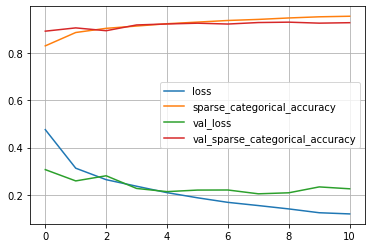

In [ ]:
df.plot()
plt.grid()
plt.show()

In [ ]:
best_model = history.model
pred_prob = best_model.predict(x_te) # 테스트 셋 예측 확률
pred_prob[:5]

array([[1.3961603e-10, 4.2643954e-15, 1.5007410e-14, 2.9297630e-14,
        2.6759302e-15, 1.9866418e-07, 4.9875479e-13, 1.4271121e-06,
        1.0324701e-11, 9.9999833e-01],
       [5.0986284e-07, 2.8541419e-13, 9.9999928e-01, 6.4690427e-12,
        1.7120634e-07, 1.1515525e-18, 4.2547143e-08, 1.1060591e-21,
        1.8836026e-10, 8.9581192e-17],
       [2.5474081e-10, 1.0000000e+00, 7.5925018e-14, 2.6001186e-11,
        1.2254566e-12, 7.2231423e-17, 8.1606305e-11, 6.7069878e-20,
        1.2201355e-10, 3.2606629e-15],
       [9.8008346e-10, 1.0000000e+00, 4.8044516e-13, 1.5267483e-10,
        3.6940423e-10, 3.2125458e-17, 7.8990203e-10, 2.4667794e-20,
        1.7527749e-13, 8.6080846e-16],
       [1.0092050e-01, 4.9176847e-08, 1.9388975e-03, 1.3622516e-04,
        2.1844679e-03, 2.9706886e-09, 8.9481902e-01, 9.4077975e-11,
        7.6975721e-07, 1.7614290e-08]], dtype=float32)

In [ ]:
te_pred = np.argmax(pred_prob, axis=1)
te_pred[:5]

array([9, 2, 1, 1, 6])

In [ ]:
np.mean(y_te == te_pred)

0.9196

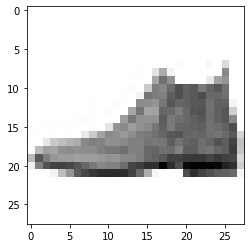

In [ ]:
te_img = x_te[0].reshape((28, 28)) # (28, 28, 1)
plt.imshow(te_img, cmap='binary')
plt.show()

## 저장된 최적 모델 분석(시각화)

In [ ]:
best_model = keras.models.load_model('best_cnn_model.h5')

In [ ]:
best_model.layers # CNN에서 작성된 layer - 은닉층, 출력층

In [ ]:
best_model.inputs # CNN 입력층

[<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv2d_input')>]

### 첫 번째 합성곱 층 시각화

In [ ]:
conv_1 = keras.Model(best_model.inputs, best_model.layers[0].output)

In [ ]:
feature_map_1 = conv_1.predict(x_te[:1])
feature_map_1.shape

(1, 28, 28, 32)

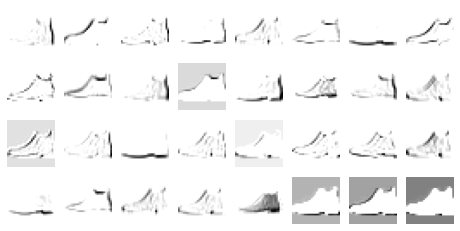

In [ ]:
fig, ax = plt.subplots(4, 8, figsize=(8,4))
for i in range(4):
    for j in range(8):
        idx = i * 8 + j
        img = feature_map_1[0, :, :, idx] # 합성곱 층 각 필터에서의 출력
        ax[i, j].imshow(img, cmap=plt.cm.binary)
        ax[i, j].axis('off')

plt.show()

### 두 번째 합성곱 층 시각화

In [ ]:
conv_2 = keras.Model(best_model.inputs, best_model.layers[1].output)
feature_map_2 = conv_2.predict(x_te[:1])
feature_map_2.shape

(1, 14, 14, 32)

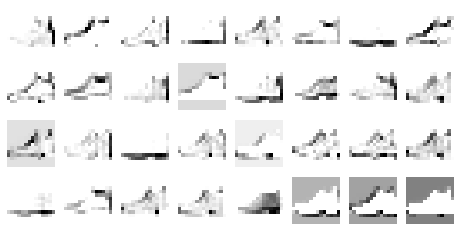

In [ ]:
fig, ax = plt.subplots(4, 8, figsize=(8,4))
for i in range(4):
    for j in range(8):
        idx = i * 8 + j
        img = feature_map_2[0, :, :, idx] # 합성곱 층 각 필터에서의 출력
        ax[i, j].imshow(img, cmap=plt.cm.binary)
        ax[i, j].axis('off')

plt.show()